In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
tests = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform_long.csv")

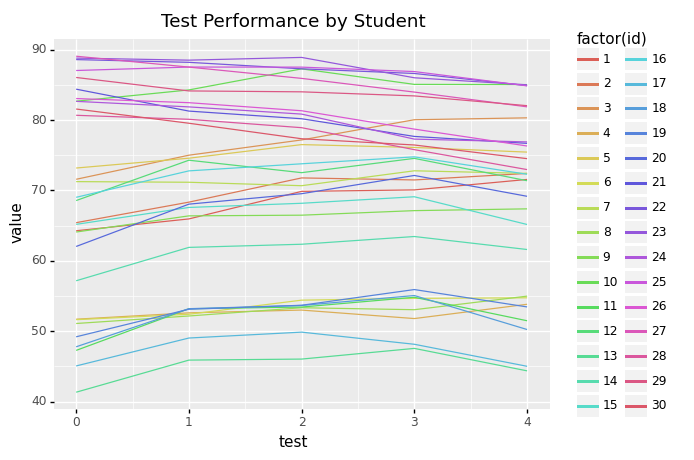

<ggplot: (8766801550120)>

In [4]:
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() +
  ggtitle("Test Performance by Student"))

In [5]:
# wide data

tests_wide = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform.csv")

tests_wide.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


In [6]:
features = ["zero", "one", "two", "three", "four"]

X = tests_wide[features]

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")

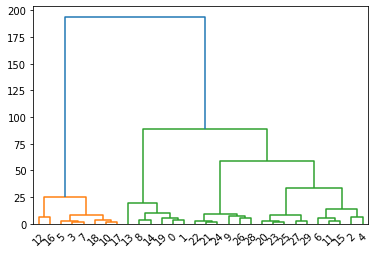

In [14]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [21]:
hac = AgglomerativeClustering(n_clusters = 2,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)



AgglomerativeClustering()

In [22]:
membership = hac.labels_
membership

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
silhouette_score(X,membership)

0.6429365563401733

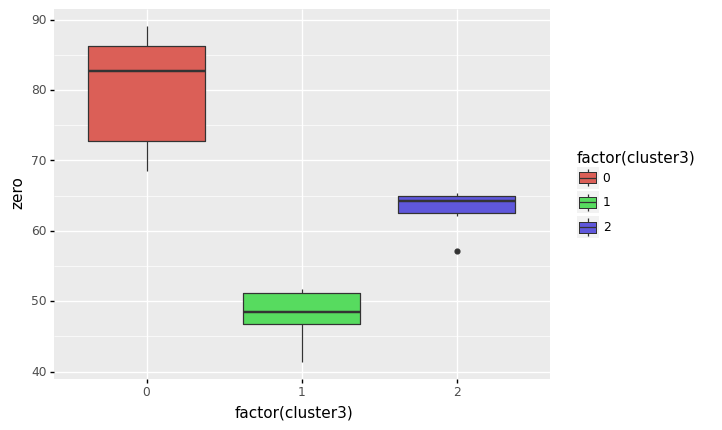

<ggplot: (8766802560139)>

In [11]:
tests_wide["cluster3"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "zero")) + geom_boxplot(aes(fill = "factor(cluster3)")))

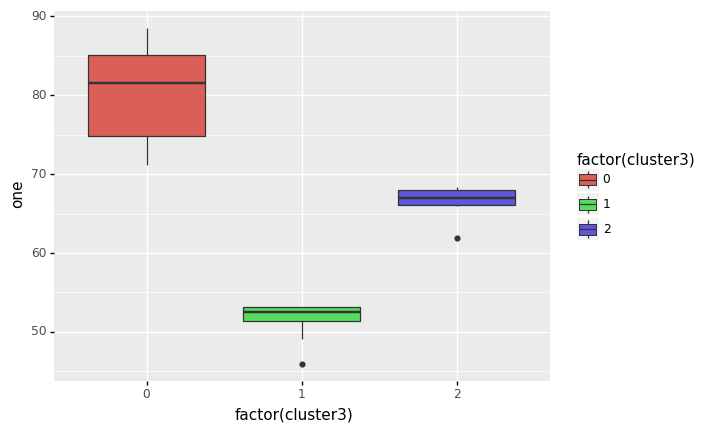

<ggplot: (8766802621344)>

In [12]:
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "one")) + geom_boxplot(aes(fill = "factor(cluster3)")))

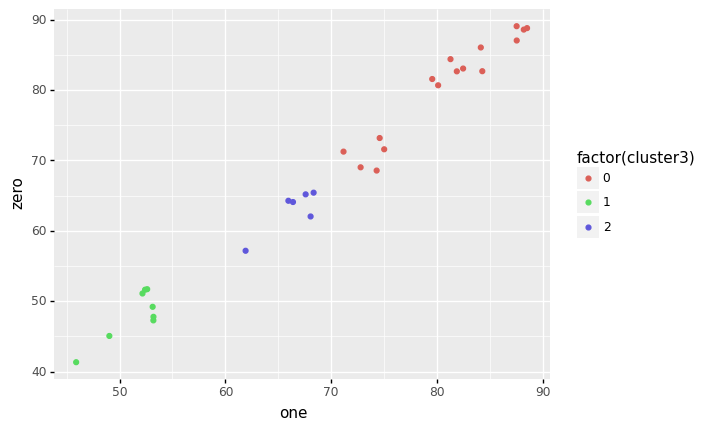

<ggplot: (8766802609604)>

In [13]:
(ggplot(tests_wide, aes(x = "one", y = "zero")) + geom_point(aes(color = "factor(cluster3)")))

# In Class

In [24]:
makeup = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/makeup.csv")
makeup.head()

,eyeshaddow,lipstick,foundation
0,4,8,4
1,11,13,4
2,8,11,4
3,11,18,3
4,10,12,3


In [28]:
hac2 = AgglomerativeClustering(n_clusters = 3,
                               affinity = "cosine",
                              linkage = "average")

hac2.fit(makeup)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

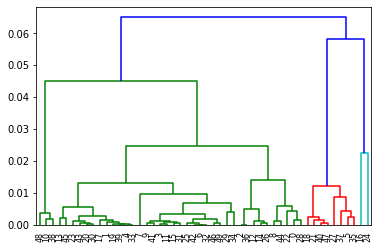

In [29]:
dendro = sch.dendrogram(sch.linkage(makeup, metric = "cosine", method='average'))

In [31]:
membership = hac2.labels_
membership

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0])

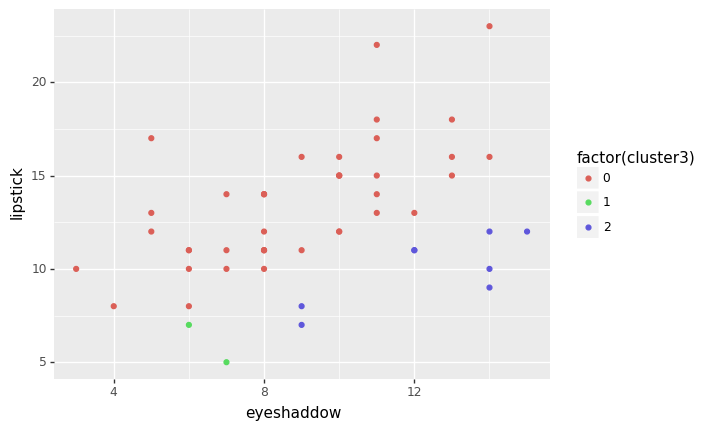

<ggplot: (310315174)>

In [33]:
makeup["cluster3"] = membership

(ggplot(makeup, aes(x = "eyeshaddow", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

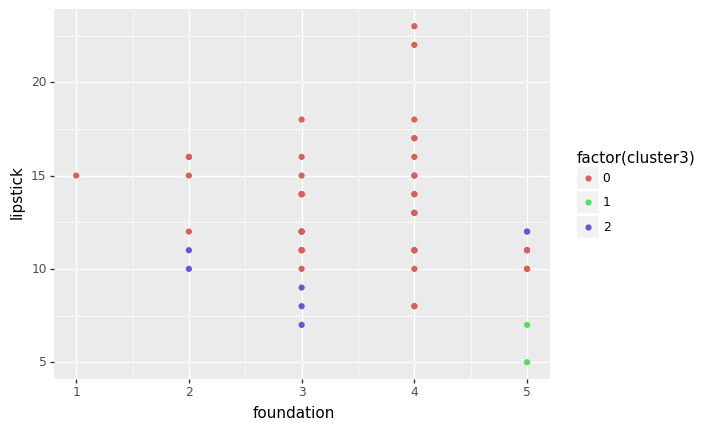

<ggplot: (310199263)>

In [34]:
(ggplot(makeup, aes(x = "foundation", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

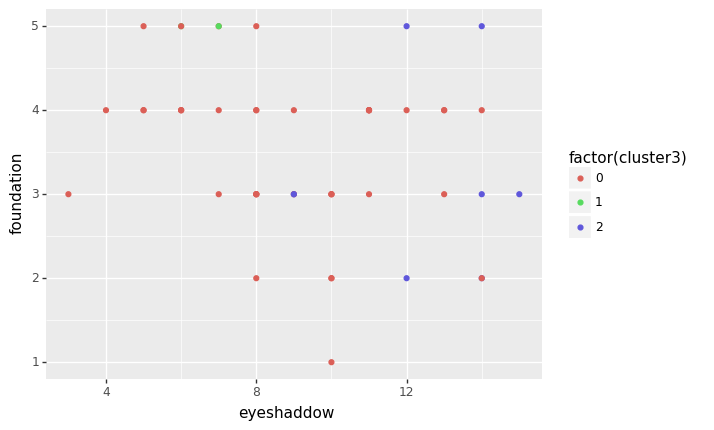

<ggplot: (310315225)>

In [35]:
(ggplot(makeup, aes(x = "eyeshaddow", y = "foundation")) + geom_point(aes(color = "factor(cluster3)")))